In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential # build nn

from tensorflow.keras.layers import Dense # final pred
from tensorflow.keras.layers import Conv2D # extract features 
from tensorflow.keras.layers import Flatten # featuremap -> 1D

from tensorflow.keras.layers import MaxPooling2D # reduce size 
from tensorflow.keras.layers import Dropout # avoid overfit

from tensorflow.keras.utils import to_categorical # one hot encode

In [12]:
df = pd.read_csv("C:/Dataset-DS/CNN/train.csv")

In [13]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.shape

(42000, 785)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [16]:
X = df.drop(columns=['label'], axis=1)
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# convert to 0 and 1

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [20]:
# reshape  - instead of list its a 2d matrix

X_train_img = X_train.values.reshape(-1, 28, 28) 
X_test_img = X_test.values.reshape(-1, 28, 28)

In [21]:
X_train_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# one hot encode

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
perceptron = Sequential([
    Flatten(input_shape=(28,28)), # 785 inputs
    Dense(10, activation='softmax') # multicat
])

In [26]:
perceptron.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = perceptron.fit(X_train_img, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7637 - loss: 1.0145 - val_accuracy: 0.8509 - val_loss: 0.6441
Epoch 2/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8620 - loss: 0.5640 - val_accuracy: 0.8678 - val_loss: 0.5110
Epoch 3/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8769 - loss: 0.4788 - val_accuracy: 0.8778 - val_loss: 0.4580
Epoch 4/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8860 - loss: 0.4370 - val_accuracy: 0.8833 - val_loss: 0.4264
Epoch 5/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8918 - loss: 0.4110 - val_accuracy: 0.8870 - val_loss: 0.4064
Epoch 6/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8955 - loss: 0.3927 - val_accuracy: 0.8906 - val_loss: 0.3920
Epoch 7/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8981 - loss: 0.3790 - val_accuracy: 0.8942 - val_loss: 0.3802
Epoch 8/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8998 - loss: 0.3682 - val_accuracy: 0.

In [29]:
acc  = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]
acc

0.8992785215377808

# ANN

In [31]:
ann = Sequential([
    Flatten(input_shape=(28,28)), # 785 inputs
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # multicat
])

In [32]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = ann.fit(X_train_img, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9021 - loss: 0.3383 - val_accuracy: 0.9481 - val_loss: 0.1755
Epoch 2/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9577 - loss: 0.1424 - val_accuracy: 0.9574 - val_loss: 0.1394
Epoch 3/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9706 - loss: 0.0991 - val_accuracy: 0.9553 - val_loss: 0.1483
Epoch 4/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9779 - loss: 0.0715 - val_accuracy: 0.9652 - val_loss: 0.1125
Epoch 5/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9824 - loss: 0.0559 - val_accuracy: 0.9661 - val_loss: 0.1135
Epoch 6/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9871 - loss: 0.0406 - val_accuracy: 0.9669 - val_loss: 0.1156
Epoch 7/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9896 - loss: 0.0309 - val_accuracy: 0.9668 - val_loss: 0.1127
Epoch 8/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.

In [34]:
acc  = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]
acc

0.9696969985961914

# CNN multilayered

In [35]:
X_train_cnn = X_train.values.reshape(-1, 28,28,1)
X_test_cnn = X_test.values.reshape(-1, 28,28,1)

In [ ]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),    # randomly deactivation 50% of neurons hence equal learning to avoid overfit
    Dense(10, activation='softmax')
])

In [39]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history_cnn = cnn.fit(X_train_cnn, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_cnn, y_test_cat), verbose=1)

Epoch 1/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9015 - loss: 0.3144 - val_accuracy: 0.9723 - val_loss: 0.0908
Epoch 2/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9672 - loss: 0.1118 - val_accuracy: 0.9797 - val_loss: 0.0611
Epoch 3/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9753 - loss: 0.0839 - val_accuracy: 0.9840 - val_loss: 0.0513
Epoch 4/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9809 - loss: 0.0645 - val_accuracy: 0.9870 - val_loss: 0.0422
Epoch 5/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9841 - loss: 0.0543 - val_accuracy: 0.9882 - val_loss: 0.0371


In [41]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]
acc_cnn

0.988167405128479

In [42]:
def plot_training(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f"{title} Loss")
    plt.legend()


    plt.show()

    

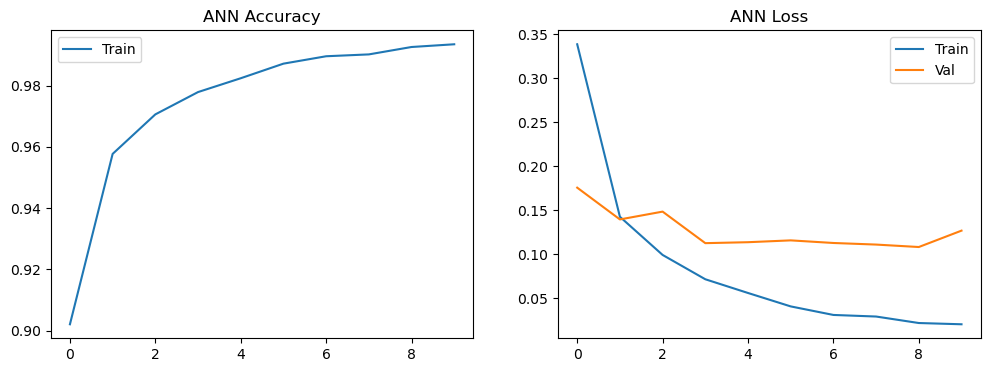

In [44]:
plot_training(history, "ANN")

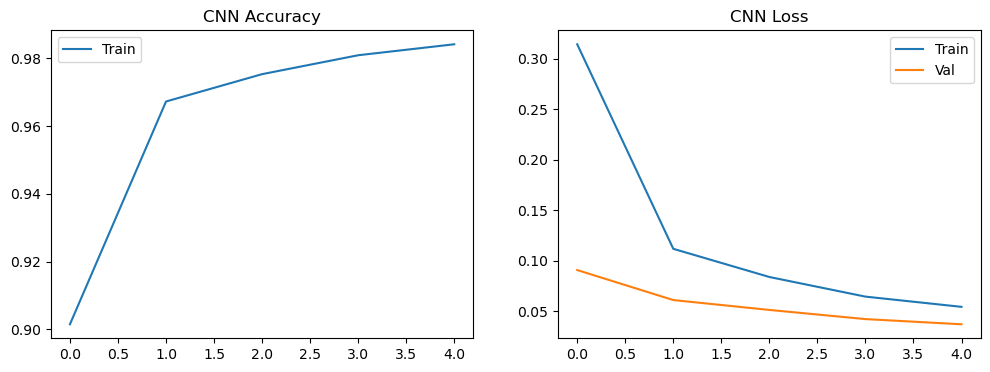

In [43]:
plot_training(history_cnn, "CNN")